In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('Train_BigMart.csv')

In [3]:
train.shape

(8523, 12)

In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
train.rename(columns = {"Item_Outlet_Sales":"Target"},inplace = True)

In [6]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Target'],
      dtype='object')


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Target                          0
dtype: int64

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Target
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.985977,1997.831867,2181.288914
std,4.643456,0.051598,62.287221,8.371760,1706.499616
min,4.555000,0.000000,0.758800,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

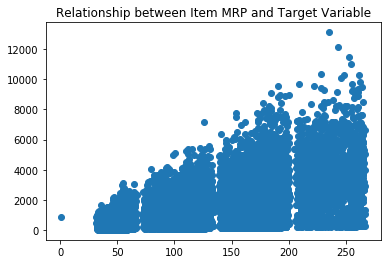

In [11]:
plt.scatter(train.Item_MRP,train.Target)
plt.title("Relationship between Item MRP and Target Variable")
plt.show()

In [12]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
train['Outlet_Age'] = 2019 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32


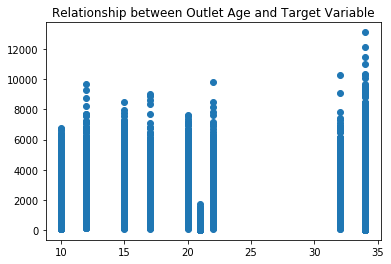

In [14]:
plt.scatter(train.Outlet_Age,train.Target)
plt.title("Relationship between Outlet Age and Target Variable")
plt.show()

In [15]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', '  ', 'Small'], dtype=object)

In [16]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Target,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.985977,1997.831867,2181.288914,21.168133
std,4.643456,0.051598,62.287221,8.371760,1706.499616,8.371760
min,4.555000,0.000000,0.758800,1985.000000,33.290000,10.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,15.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,20.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,32.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,34.000000


In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2387
High       932
             1
Name: Outlet_Size, dtype: int64

In [19]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [20]:
type(train['Outlet_Size'].mode())

pandas.core.series.Series

In [21]:
train['Outlet_Size'].mode()[0]

'Medium'

In [22]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('Medium')

In [23]:
# fill the na for outlet size with medium
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [24]:
# fill the na for item weight with the mean of weights
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [25]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Target                       0
Outlet_Age                   0
dtype: int64

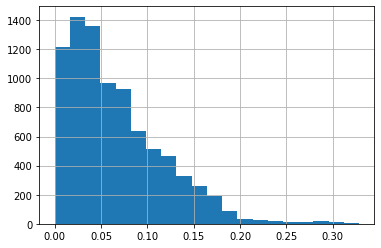

In [26]:
train['Item_Visibility'].hist(bins=20)

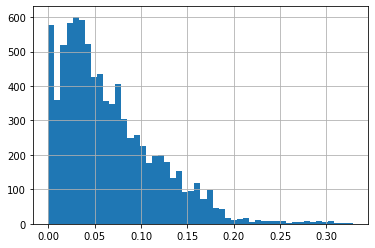

In [27]:
train['Item_Visibility'].hist(bins=50)

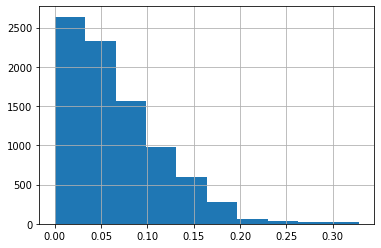

In [28]:
train['Item_Visibility'].hist(bins=10)

# BOXPLOT

In [29]:
# delete the observations

Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [30]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,32
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,17
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,15
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,10


In [31]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [32]:
train = filt_train
train.shape

(8379, 13)

In [33]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.061425      2
0.074779      2
0.073562      2
           ... 
0.146896      1
0.081119      1
0.122735      1
0.100641      1
0.027617      1
Name: Item_Visibility, Length: 7736, dtype: int64

In [34]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,21,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32,NaN


In [36]:
train['Item_Visibility_bins'].mode()

0    Low Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [Low Viz < Viz < High Viz]

In [37]:
train['Item_Visibility_bins'].isnull().sum()

526

In [38]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(NaN, 'Low Viz')

In [39]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,32,Low Viz
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,17,Low Viz
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,15,Low Viz
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,10,High Viz
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,22,Low Viz


In [40]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [41]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [42]:
#choosing the Fat content, item vizibility bins, outlet size, loc type and type for LABEL ENCODER

In [43]:
le = LabelEncoder()

In [44]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [45]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [46]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Target,Outlet_Age,Item_Visibility_bins
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,32,Low Viz
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,17,Low Viz
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,15,Low Viz
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,10,High Viz
8522,DRG01,14.800,0,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,22,Low Viz


In [47]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [48]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [49]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [50]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [51]:
# create dummies for outlet type

In [52]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [53]:
train = pd.concat([train, dummy], axis=1)

In [54]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Target                       float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [55]:
# got to drop all the object types features
train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [56]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Target', 'Outlet_Age',
       'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [57]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Target,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,2,0,3735.1380,20,1,0,1,0,0
1,5.92,1,0.019278,48.2692,2,2,443.4228,10,1,0,0,1,0
2,17.50,0,0.016760,141.6180,2,0,2097.2700,20,1,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,732.3800,21,1,1,0,0,0
4,8.93,0,0.000000,53.8614,1,2,994.7052,32,1,0,1,0,0


In [58]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Target', 'Outlet_Age',
       'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [59]:
X = train.drop('Target', axis=1)
y = train.Target

In [60]:
test = pd.read_csv('Test_BigMart.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [61]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [62]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [63]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace(NaN, 'Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [Low Viz < Viz < High Viz]

In [64]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [65]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [66]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [67]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [68]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [69]:
test['Outlet_Age'] = 2018 - test['Outlet_Establishment_Year']

In [70]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [71]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [72]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Outlet_Age', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [73]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
print (X.shape)
print (y.shape)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(8379, 12)
(8379,)
(5865, 12)
(2514, 12)
(5865,)
(2514,)


# LINEAR REGRESSION MODEL PREDICTION

In [75]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(xtrain, ytrain)
predictions = lin.predict(xtest)

In [77]:
predictions

array([-641.36524392, 2866.21510864, 1439.14461484, ..., 1912.69844684,
       3142.47720414, 4251.42114016])

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
print(sqrt(mean_squared_error(ytest, predictions)))

1118.6171598496717
